In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
iris = pd.read_csv('iris.csv')

In [3]:
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


<Axes: xlabel='variety', ylabel='count'>

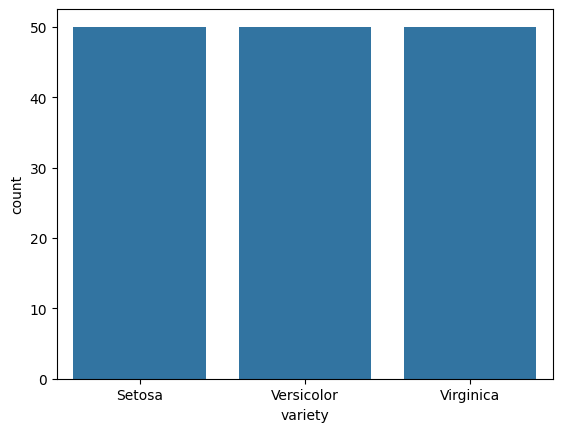

In [4]:
#Bar plot for categorical column "Variety"
import seaborn as sns
counts = iris["variety"].value_counts()
sns.barplot(data=counts)

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris[iris.duplicated(keep=False)]

,sepal.length,sepal.width,petal.length,petal.width,variety
101,5.8,2.7,5.1,1.9,Virginica
142,5.8,2.7,5.1,1.9,Virginica


observations
- There are 150 rows and 5 columns
- There are no null values
- There is one duplicate row
- The x-columns are sepal.length,sepal.width,sepal.length and petal.width
- All the x-columns are continuous
- The y-column is "veriety" which is categorical
- There are three flower categories(classes)

In [7]:
#Drop the duplicaates
iris = iris.drop_duplicates(keep='first')

In [8]:
#ensure further that no duplicated rows are present
iris[iris.duplicated]

,sepal.length,sepal.width,petal.length,petal.width,variety


In [9]:
#reset the index
iris = iris.reset_index(drop=True)
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Virginica
145,6.3,2.5,5.0,1.9,Virginica
146,6.5,3.0,5.2,2.0,Virginica
147,6.2,3.4,5.4,2.3,Virginica


In [10]:
#Encode the three flower classes as 0,1,2

labelencoder = LabelEncoder()
iris.iloc[:, -1] = labelencoder.fit_transform(iris.iloc[:, -1])
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  149 non-null    float64
 1   sepal.width   149 non-null    float64
 2   petal.length  149 non-null    float64
 3   petal.width   149 non-null    float64
 4   variety       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


***Observation***
- The target column('variety') is still object type. it needs to be converted to numeric(int)

In [12]:
#convert the target  column datatype to integer
iris['variety']=pd.to_numeric(labelencoder.fit_transform(iris['variety']))
print(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  149 non-null    float64
 1   sepal.width   149 non-null    float64
 2   petal.length  149 non-null    float64
 3   petal.width   149 non-null    float64
 4   variety       149 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 5.9 KB
None


In [13]:
#Divide the dataset  into x-coolums and y-columns
X=iris.iloc[:,0:4]
Y=iris['variety']

In [14]:
Y

,variety
0,0
1,0
2,0
3,0
4,0
...,...
144,2
145,2
146,2
147,2


In [15]:
X

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
144,6.7,3.0,5.2,2.3
145,6.3,2.5,5.0,1.9
146,6.5,3.0,5.2,2.0
147,6.2,3.4,5.4,2.3


In [16]:
X_train, x_test, Y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state = 10)
X_train.head(20)

,sepal.length,sepal.width,petal.length,petal.width
126,6.2,2.8,4.8,1.8
68,6.2,2.2,4.5,1.5
91,6.1,3.0,4.6,1.4
63,6.1,2.9,4.7,1.4
142,6.8,3.2,5.9,2.3
116,6.5,3.0,5.5,1.8
14,5.8,4.0,1.2,0.2
48,5.3,3.7,1.5,0.2
59,5.2,2.7,3.9,1.4
20,5.4,3.4,1.7,0.2


In [17]:
X_train, x_test, Y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state = 10)
X_train

,sepal.length,sepal.width,petal.length,petal.width
126,6.2,2.8,4.8,1.8
68,6.2,2.2,4.5,1.5
91,6.1,3.0,4.6,1.4
63,6.1,2.9,4.7,1.4
142,6.8,3.2,5.9,2.3
...,...,...,...,...
113,5.7,2.5,5.0,2.0
64,5.6,2.9,3.6,1.3
15,5.7,4.4,1.5,0.4
125,7.2,3.2,6.0,1.8


In [18]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth = None)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

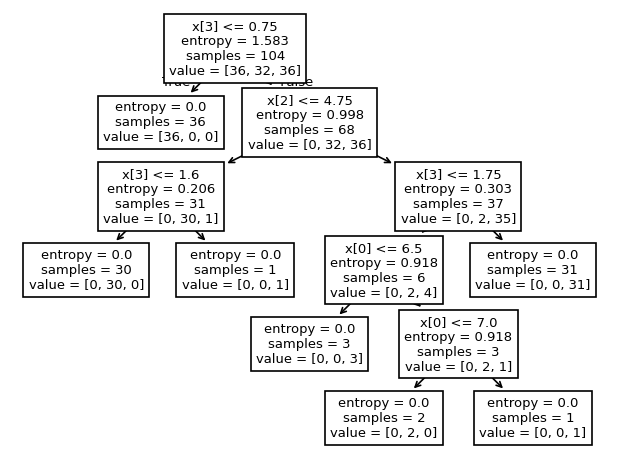

In [19]:
plt.figure(dpi=120)
tree.plot_tree(model);

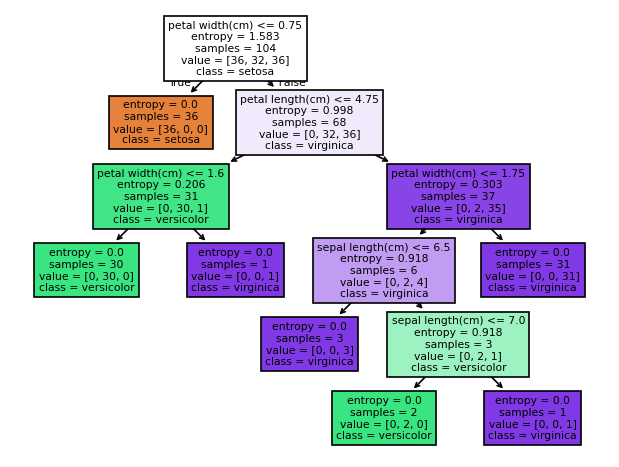

In [23]:
fn=['sepal length(cm)','sepal width(cm)','petal length(cm)','petal width(cm)']
cn=['setosa','versicolor','virginica']
plt.figure(dpi=120)
tree.plot_tree(model,feature_names = fn, class_names=cn,filled = True);

In [24]:
#predict5ing on test data
preds = model.predict(x_test)
preds

array([1, 2, 0, 1, 1, 1, 1, 2, 0, 2, 2, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       1, 0, 1, 0, 1, 2, 1, 1, 2, 2, 2, 2, 1, 0, 1, 0, 2, 2, 0, 1, 0, 2,
       0])

In [25]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.83      0.91        18
           2       0.81      1.00      0.90        13

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.95      0.93      0.93        45



In [31]:
pred_train =model.predict(X_train)
print(classification_report(Y_train,pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        36

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104

